<a href="https://colab.research.google.com/github/demigodng/Group-4-5103/blob/master/Twitter%20Sentiment%20Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description: This program gets the sentiment of Bitcoin from Twitter Users

In [1]:
#import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#upload the login file
from google.colab import files
files.upload()

Saving login.csv to login.csv


{'login.csv': b'\xef\xbb\xbfkey\r\nwDS02tBYuHFVDLJAEeXiaNP7q\r\nHFjpaeGacbTOMJd4A9IBiEY1j37r0AgWA6ZGVlQ6lYAlgFk9n5\r\n946878279188996097-yVtP7hyt6t9BqZYH12T4JN7jJYOiVrr\r\nmemPtLVRJnoH6yBRxJys79I2OyzH5RTXbYYZUarkYDdjl\r\n'}

In [3]:
#Store the data
log = pd.read_csv('login.csv')

In [4]:
#Get the twitter API details
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [5]:
#Create the suthentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set the access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#Create the API object
api=tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
#gather 2000 tweets about coin and filter out any retweets 'RT'
search_term = "bitcoin -filter:retweets"
#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since = '2018-11-01', tweet_mode= 'extended').items(2000)
#Store the tweets in a variabl and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [7]:
#Create a dataframe to store the tweets with a column called tweets
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the first 5 rows of data
df.head(5)

,Tweets
0,@CUMfinance @Uniswap $CUM @CUMfinance #crypto ...
1,@CUMfinance @Uniswap Hi\n\n$CUM @CUMFINANCE #c...
2,While the Lightning NetWork Solves two of Bitc...
3,Next update makes using these new privacy enha...
4,- AlertSeattle: COVID-19 Update – July 17 – Ju...


In [8]:
#Create a function to clean teh tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) #Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Remove any strings with the '#'
  twt = re.sub('\\n', '', twt) #Remove the '\n' String
  twt = re.sub('https?:\/\/\S+', '', twt) #Removes any hyperlinks
  return twt


In [9]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data
df.head(10)

,Tweets,Cleaned_Tweets
0,@CUMfinance @Uniswap $CUM @CUMfinance #crypto ...,@CUMfinance @Uniswap $CUM @CUMfinance $AXS$D...
1,@CUMfinance @Uniswap Hi\n\n$CUM @CUMFINANCE #c...,@CUMfinance @Uniswap Hi$CUM @CUMFINANCE $AXS...
2,While the Lightning NetWork Solves two of Bitc...,While the Lightning NetWork Solves two of Bitc...
3,Next update makes using these new privacy enha...,Next update makes using these new privacy enha...
4,- AlertSeattle: COVID-19 Update – July 17 – Ju...,- AlertSeattle: COVID-19 Update – July 17 – Ju...
5,@FewKnow21 @Bitcoin Plus that was not the real...,@FewKnow21 @Bitcoin Plus that was not the real...
6,I’ve been able to focus on things that truly m...,I’ve been able to focus on things that truly m...
7,@huyjiikkb I just confused me how he got sente...,@huyjiikkb I just confused me how he got sente...
8,Does #Bitcoin ever go under 30k again?,Does Bitcoin ever go under 30k again?
9,@ladyincrypto @CUMfinance $CUM @CUMFINANCE #cr...,@ladyincrypto @CUMfinance $CUM @CUMFINANCE $...


In [10]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head()


,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,@CUMfinance @Uniswap $CUM @CUMfinance #crypto ...,@CUMfinance @Uniswap $CUM @CUMfinance $AXS$D...,0.000000,0.000000
1,@CUMfinance @Uniswap Hi\n\n$CUM @CUMFINANCE #c...,@CUMfinance @Uniswap Hi$CUM @CUMFINANCE $AXS...,0.000000,0.000000
2,While the Lightning NetWork Solves two of Bitc...,While the Lightning NetWork Solves two of Bitc...,0.688000,0.072000
3,Next update makes using these new privacy enha...,Next update makes using these new privacy enha...,0.250909,0.147273
4,- AlertSeattle: COVID-19 Update – July 17 – Ju...,- AlertSeattle: COVID-19 Update – July 17 – Ju...,0.000000,0.000000


In [11]:
#Create a function to get the text sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [12]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#SHow the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@CUMfinance @Uniswap $CUM @CUMfinance #crypto ...,@CUMfinance @Uniswap $CUM @CUMfinance $AXS$D...,0.000000,0.000000,Neutral
1,@CUMfinance @Uniswap Hi\n\n$CUM @CUMFINANCE #c...,@CUMfinance @Uniswap Hi$CUM @CUMFINANCE $AXS...,0.000000,0.000000,Neutral
2,While the Lightning NetWork Solves two of Bitc...,While the Lightning NetWork Solves two of Bitc...,0.688000,0.072000,Positive
3,Next update makes using these new privacy enha...,Next update makes using these new privacy enha...,0.250909,0.147273,Positive
4,- AlertSeattle: COVID-19 Update – July 17 – Ju...,- AlertSeattle: COVID-19 Update – July 17 – Ju...,0.000000,0.000000,Neutral


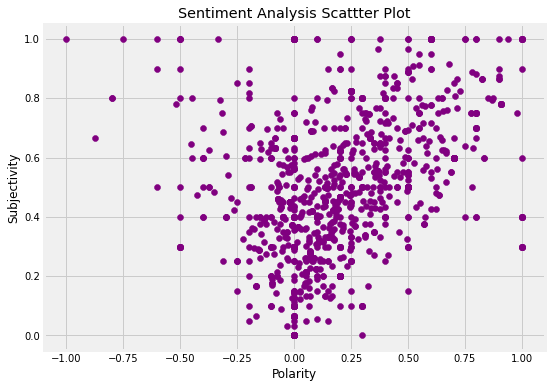

In [13]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Purple')
plt.title('Sentiment Analysis Scattter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

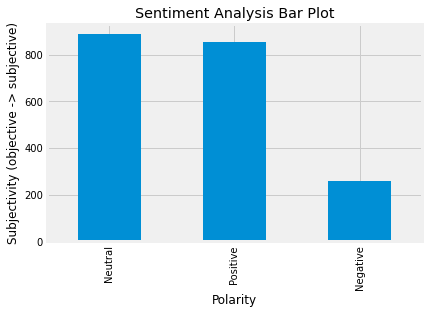

In [14]:
#Create a bar chart to show the count of Positive, Neutral, and Negative sentiment
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()